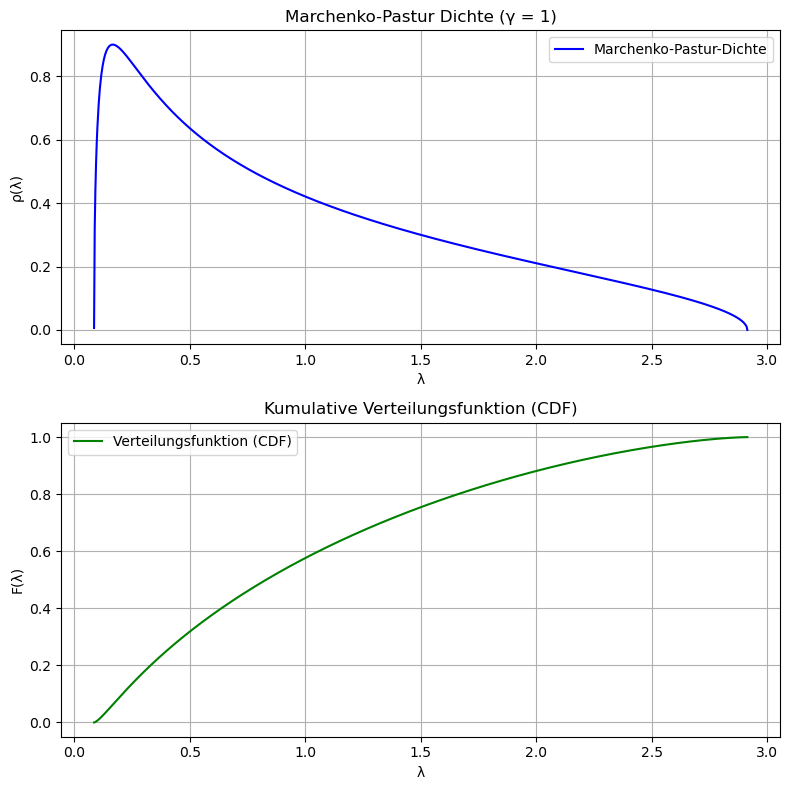

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parameter
gamma = 0.5  # Verhältnis p/n
lambda_minus = (1 - np.sqrt(gamma))**2
lambda_plus = (1 + np.sqrt(gamma))**2

# Kleines Epsilon, um Division durch Null zu vermeiden
epsilon = 1e-6
x_vals = np.linspace(lambda_minus + epsilon, lambda_plus, 1000)

# Marchenko-Pastur Dichtefunktion
def mp_density(lambda_val, gamma):
    lambda_minus = (1 - np.sqrt(gamma))**2
    lambda_plus = (1 + np.sqrt(gamma))**2
    if lambda_val < lambda_minus or lambda_val > lambda_plus:
        return 0.0
    return (1 / (2 * np.pi * gamma * lambda_val)) * np.sqrt((lambda_plus - lambda_val) * (lambda_val - lambda_minus))

# Berechne Dichte und Verteilungsfunktion
y_vals = [mp_density(x, gamma) for x in x_vals]
cdf_vals = [quad(mp_density, lambda_minus + epsilon, x, args=(gamma,))[0] for x in x_vals]

# Plot der Dichte und der Verteilungsfunktion
fig, axs = plt.subplots(2, 1, figsize=(8, 8))

# Dichte
axs[0].plot(x_vals, y_vals, label="Marchenko-Pastur-Dichte", color='blue')
axs[0].set_title("Marchenko-Pastur Dichte (γ = 1)")
axs[0].set_xlabel("λ")
axs[0].set_ylabel("ρ(λ)")
axs[0].grid(True)
axs[0].legend()

# Verteilungsfunktion
axs[1].plot(x_vals, cdf_vals, label="Verteilungsfunktion (CDF)", color='green')
axs[1].set_title("Kumulative Verteilungsfunktion (CDF)")
axs[1].set_xlabel("λ")
axs[1].set_ylabel("F(λ)")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()